# Lab1

In [2]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

## Exercise one: Identifying handwritten numbers

### Question 1

Some exaples where number recognition could be usefull are:
1. Archiving old documents
2. reading cheques
3. grading tests


In [3]:
# Import data set from mnist
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
# Reshape the train and test set
x_train_re = x_train.reshape(60000,784) / 255
x_test_re = x_test.reshape(10000, 784) / 255

In [5]:
y_train_new = keras.utils.to_categorical(y_train, 10)
y_test_new = keras.utils.to_categorical(y_test, 10)

In [6]:
model = keras.Sequential()
model.add(keras.layers.Dense(256, input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(loss='categorical_crossentropy',
optimizer=keras.optimizers.RMSprop(), metrics='accuracy')

In [8]:
history = model.fit(x_train_re, y_train_new, batch_size=128, epochs=12, verbose=1, validation_split=0.2)

Epoch 1/12
375/375 [==============================] - 1s 3ms/step - loss: 0.4036 - accuracy: 0.8835 - val_loss: 0.2918 - val_accuracy: 0.9184
Epoch 2/12
375/375 [==============================] - 1s 2ms/step - loss: 0.3098 - accuracy: 0.9125 - val_loss: 0.2768 - val_accuracy: 0.9260
Epoch 3/12
375/375 [==============================] - 1s 2ms/step - loss: 0.2941 - accuracy: 0.9176 - val_loss: 0.2857 - val_accuracy: 0.9228
Epoch 4/12
375/375 [==============================] - 1s 2ms/step - loss: 0.2864 - accuracy: 0.9200 - val_loss: 0.2726 - val_accuracy: 0.9252
Epoch 5/12
375/375 [==============================] - 1s 2ms/step - loss: 0.2822 - accuracy: 0.9208 - val_loss: 0.2842 - val_accuracy: 0.9230
Epoch 6/12
375/375 [==============================] - 1s 2ms/step - loss: 0.2782 - accuracy: 0.9227 - val_loss: 0.2761 - val_accuracy: 0.9248
Epoch 7/12
375/375 [==============================] - 1s 2ms/step - loss: 0.2743 - accuracy: 0.9222 - val_loss: 0.2837 - val_accuracy: 0.9227
Epoch 

### Question 2: 
From the output we see that each epoch takes around 2 mili seconds.

### Question 3:
The accuracy is shown below


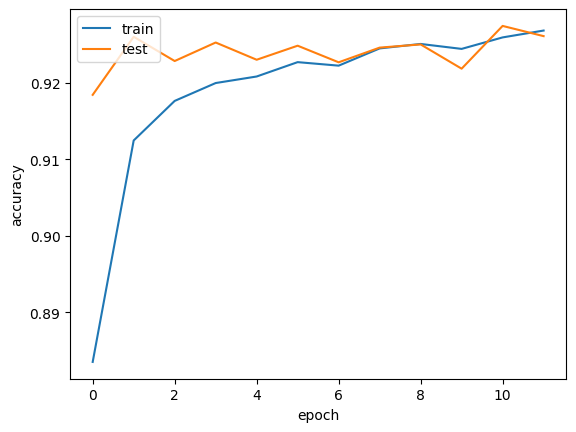

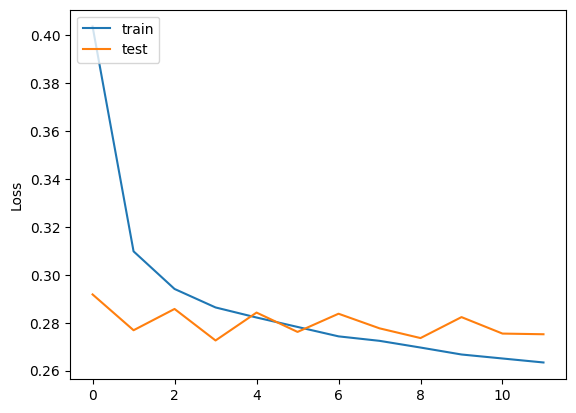

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Question 4:
From the plots we see that the train and test values match well. This seems that the model generalizes well. However the test set doesn't seem to improve with each epoch, this could indicate overfitting.


In [10]:
loss, accuracy = model.evaluate(x_test_re, y_test_new, verbose=1)

313/313 [==============================] - 0s 800us/step - loss: 0.2781 - accuracy: 0.9265


### Question 5 and 6:
The accuracy is 0.9265

The loss is 0.2781

According to the accuracy 1 in every 10 numbers is wrongly identified. So this model wouldn't be usefull, for example if a person writes their phonenumber which contains more 10 numbers, their phonenumber will be wrongly identified most of the time. 


### Question 7 - 9

Chosing a linear activation functions, creates a linear model. This limits the amount of computations because the model cannot detect any non-linear patterns.

In [11]:
model2 = keras.Sequential()
model2.add(keras.layers.Dense(256, input_shape=(784,), activation = 'relu'))
model2.add(keras.layers.Dense(10, activation='softmax'))
model2.compile(loss='categorical_crossentropy',
optimizer=keras.optimizers.RMSprop(), metrics='accuracy')

In [12]:
fit_model2 = model2.fit(x_train_re, y_train_new, batch_size=128, epochs=12, verbose=1, validation_split=0.2)

Epoch 1/12
375/375 [==============================] - 1s 3ms/step - loss: 0.3193 - accuracy: 0.9105 - val_loss: 0.1768 - val_accuracy: 0.9490
Epoch 2/12
375/375 [==============================] - 1s 2ms/step - loss: 0.1436 - accuracy: 0.9585 - val_loss: 0.1518 - val_accuracy: 0.9526
Epoch 3/12
375/375 [==============================] - 1s 2ms/step - loss: 0.0990 - accuracy: 0.9714 - val_loss: 0.1052 - val_accuracy: 0.9697
Epoch 4/12
375/375 [==============================] - 1s 2ms/step - loss: 0.0734 - accuracy: 0.9787 - val_loss: 0.0894 - val_accuracy: 0.9733
Epoch 5/12
375/375 [==============================] - 1s 2ms/step - loss: 0.0569 - accuracy: 0.9838 - val_loss: 0.0834 - val_accuracy: 0.9763
Epoch 6/12
375/375 [==============================] - 1s 2ms/step - loss: 0.0449 - accuracy: 0.9869 - val_loss: 0.0878 - val_accuracy: 0.9747
Epoch 7/12
375/375 [==============================] - 1s 2ms/step - loss: 0.0361 - accuracy: 0.9894 - val_loss: 0.0771 - val_accuracy: 0.9783
Epoch 

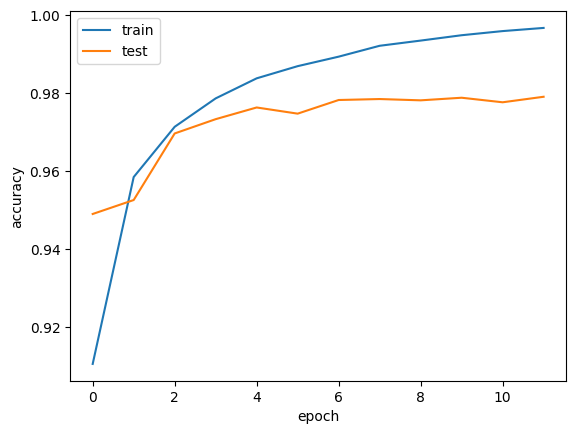

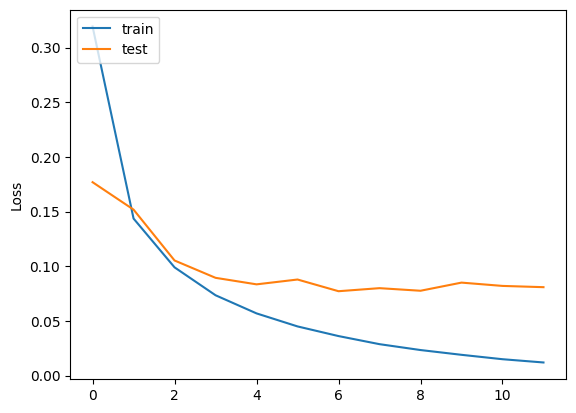

In [13]:
plt.plot(fit_model2.history['accuracy'])
plt.plot(fit_model2.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(fit_model2.history['loss'])
plt.plot(fit_model2.history['val_loss'])
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

The validation and test results differ more from each other than in the first model. This means the model is less general. 

However the loss of the test is lower than in the first model and the accuracy is higher.

## Deep convolutional networks

In [14]:
x_train_2 = x_train.reshape(60000, 28, 28, 1) / 255
x_test_2 = x_test.reshape(10000, 28, 28, 1) / 255

In [15]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3),
activation="relu", input_shape=(28, 28, 1)))
model.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3),
activation="relu"))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adadelta(learning_rate=1),
metrics='accuracy')

In [16]:
fit3 =  model.fit(x_train_2, y_train_new, batch_size=128, epochs=12, verbose=1, validation_split=0.2)

Epoch 1/12
375/375 [==============================] - 34s 92ms/step - loss: 0.2245 - accuracy: 0.9319 - val_loss: 0.0683 - val_accuracy: 0.9797
Epoch 2/12
375/375 [==============================] - 36s 95ms/step - loss: 0.0517 - accuracy: 0.9842 - val_loss: 0.0475 - val_accuracy: 0.9856
Epoch 3/12
375/375 [==============================] - 34s 90ms/step - loss: 0.0325 - accuracy: 0.9895 - val_loss: 0.0523 - val_accuracy: 0.9852
Epoch 4/12
375/375 [==============================] - 33s 88ms/step - loss: 0.0221 - accuracy: 0.9929 - val_loss: 0.0438 - val_accuracy: 0.9874
Epoch 5/12
375/375 [==============================] - 34s 90ms/step - loss: 0.0148 - accuracy: 0.9956 - val_loss: 0.0451 - val_accuracy: 0.9884
Epoch 6/12
375/375 [==============================] - 33s 87ms/step - loss: 0.0098 - accuracy: 0.9970 - val_loss: 0.0409 - val_accuracy: 0.9890
Epoch 7/12
375/375 [==============================] - 32s 86ms/step - loss: 0.0072 - accuracy: 0.9978 - val_loss: 0.0537 - val_accuracy:

### Question 10

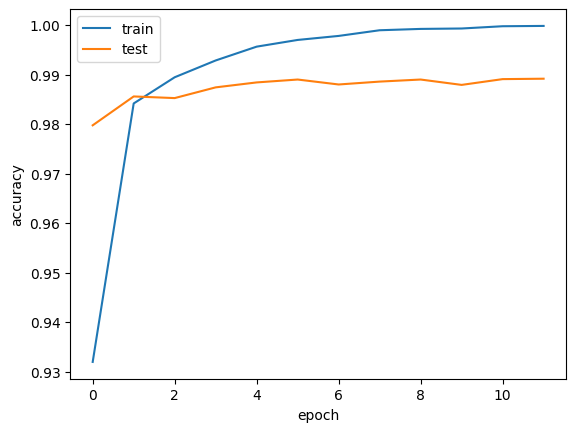

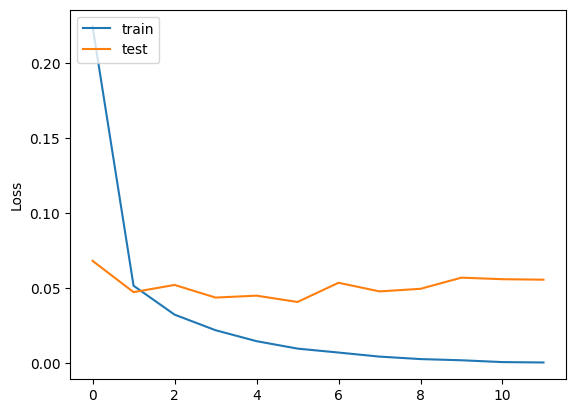

In [17]:
plt.plot(fit3.history['accuracy'])
plt.plot(fit3.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(fit3.history['loss'])
plt.plot(fit3.history['val_loss'])
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Question 11

The loss is decreased and the accuracy is increased.

### Question 12


In [26]:
loss, accuracy = model.evaluate(x_test_2, y_test_new, verbose=1)

313/313 [==============================] - 2s 6ms/step - loss: 0.0359 - accuracy: 0.9891: 0s - loss: 0.0377 - accura


The accuray is: 0.9891
The loss is: 0.0377

This is an improvement over the old model, and can thus be more use full. By creating a threshold the model can identify numbers it is really sure about and notify a human agend about the numbers it is less sure about so this can be checked.

In [27]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3),
activation="relu", input_shape=(28, 28, 1)))
model.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3),
activation="relu"))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(rate=0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.add(keras.layers.Dropout(rate=0.5))
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adadelta(learning_rate=1),
metrics='accuracy')

In [28]:
fit4 =  model.fit(x_train_2, y_train_new, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
375/375 [==============================] - 33s 88ms/step - loss: nan - accuracy: 0.1234 - val_loss: nan - val_accuracy: 0.0995
Epoch 2/6
119/375 [========>.....................] - ETA: 23s - loss: nan - accuracy: 0.0944

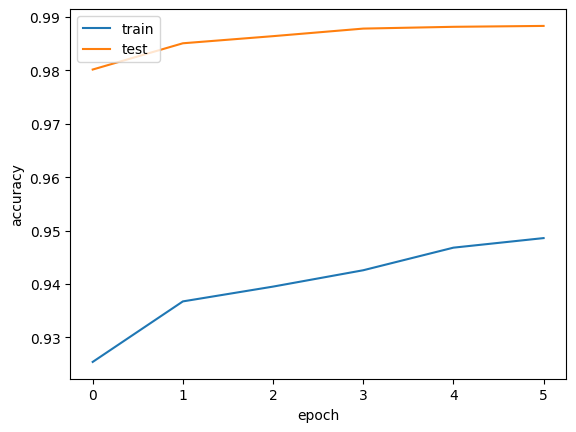

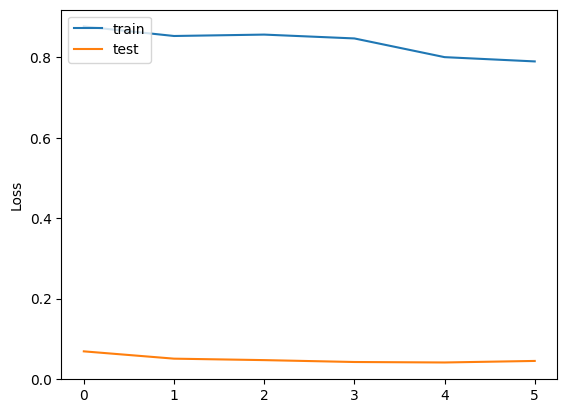

In [22]:
plt.plot(fit4.history['accuracy'])
plt.plot(fit4.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(fit4.history['loss'])
plt.plot(fit4.history['val_loss'])
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()